In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

В последовательном варианте программы в методе `KMeans` есть несколько циклов `for`,  которые можно распараллелить. При этом в трех циклах достаточно написать `#pragma omp parallel for`, а в одном, в котором есть строчка `++clusters_sizes[clusters[i]];`, просто дописать одну строчку не получится, так как в таком случае при исполнении этой строчки сумма может получиться некорректной. Поэтому в этом месте были заведены переменные `cluster_sizes_local` и `centroids_local`, в которые параллельно записывались результаты выполнения цикла. Результаты затем были слиты в `clusters_sizes` и `centroids` в секции `#pragma omp critical`. Таким образом, все циклы, в которых программа проводит много времени были распараллелены.

В результате при количестве кластеров 10, количестве точек 1000000 и размерности 2, получились следующие результаты:

Text(0,0.5,'seconds')

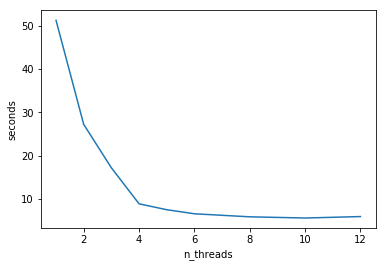

In [2]:
runtime = {1: 51.1923, 2: 27.2322, 3: 17.2347, 4: 8.94922, 5: 7.59104, 6: 6.654, 8: 5.95518, 10: 5.68033, 12: 6.0112}
x = list(runtime.keys())
y = list(map(lambda k: runtime[k], x))
plt.plot(x, y)
plt.xlabel('n_threads')
plt.ylabel('seconds')

Видно, что оптимальным количеством потоков будет 8, дальше прирост производительности очень незначительный.

В зависимости от количества точек при фиксированном количестве кластеров равном 10:

Text(0,0.5,'seconds')

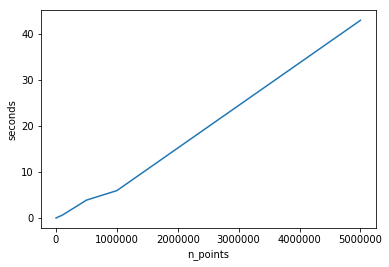

In [3]:
num_points = {1000: 0.0101408, 5000: 0.0239064, 10000: 0.0593454, 50000: 0.321495,
              100000: 0.593013, 500000: 3.88638, 1000000: 5.95518, 5000000: 42.892}
x = list(num_points.keys())
y = list(map(lambda k: num_points[k], x))
plt.plot(x, y)
plt.xlabel('n_points')
plt.ylabel('seconds')

Видно, что время растет линейно.

В зависимости от количества кластеров при фиксированном количестве точек равном 1000000:

Text(0,0.5,'seconds')

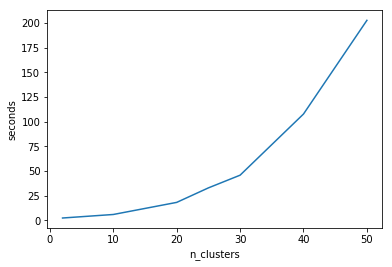

In [4]:
num_clusters = {2: 2.38562, 10: 5.95518, 20: 18.2094, 25: 32.9019, 30: 45.773, 40: 107.739, 50: 202.645}
x = list(num_clusters.keys())
y = list(map(lambda k: num_clusters[k], x))
plt.plot(x, y)
plt.xlabel('n_clusters')
plt.ylabel('seconds')

Видно, что время растет очень быстро, так как с ростом количества кластеров количество итераций, необходимых для сходимости алгоритма, многократно возрастает.